# Spotify Data Analysis Project
## 1. Overview about the project 
##### "The Spotify Million Playlist Dataset Challenge consists of a dataset and evaluation to enable research in music recommendations. It is a continuation of the RecSys Challenge 2018, which ran from January to July 2018. 
##### **Goal:** Develop a system which takes a playlist, and predict the next songs on the playlist.
##### **Dataset:** https://www.aicrowd.com/challenges/spotify-million-playlist-dataset-challenge#dataset

## 2. Load the Data
#### Since the json file consists a large data, I will break it chunks and read the first 1024 bytes first. The dictionary below is the example of how 1/1000 playlist in 1 json file looks like.

In [168]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json

In [169]:
import os
# Define the full path to the file
file_path = '/home/student/ttngo/SpotifyDataProject/data/mpd.slice.0-999.json'

# Check if the file exists
file_exists = os.path.exists(file_path)
print("File exists:", file_exists)
# If the file exists, open and read it
if file_exists:
    with open(file_path, 'r') as f:
        data = f.read(1024)  # Read only the first 1024 bytes
        print("File read successfully")
        print(data)
else:
    print("File not found at the specified path")

File exists: True
File read successfully
{
    "info": {
        "generated_on": "2017-12-03 08:41:42.057563", 
        "slice": "0-999", 
        "version": "v1"
    }, 
    "playlists": [
        {
            "name": "Throwbacks", 
            "collaborative": "false", 
            "pid": 0, 
            "modified_at": 1493424000, 
            "num_tracks": 52, 
            "num_albums": 47, 
            "num_followers": 1, 
            "tracks": [
                {
                    "pos": 0, 
                    "artist_name": "Missy Elliott", 
                    "track_uri": "spotify:track:0UaMYEvWZi0ZqiDOoHU3YI", 
                    "artist_uri": "spotify:artist:2wIVse2owClT7go1WT98tk", 
                    "track_name": "Lose Control (feat. Ciara & Fat Man Scoop)", 
                    "album_uri": "spotify:album:6vV5UrXcfyQD1wu4Qo2I9K", 
                    "duration_ms": 226863, 
                    "album_name": "The Cookbook"
                }, 
                {
      

## 3. Inspecting the data the first of 1000 dictionaries.

In [172]:
print("LET'S OVERVIEW HOW PLAYLIST INSIDE 1 JSON FILE LOOKS LIKE.")
data = json.load(open('/home/student/ttngo/SpotifyDataProject/data/mpd.slice.0-999.json'))
dfp = pd.DataFrame(data['playlists']) #get the dataframe from key of dictionary json
dfp

LET'S OVERVIEW HOW PLAYLIST INSIDE 1 JSON FILE LOOKS LIKE.


,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists,description
0,Throwbacks,false,0,1493424000,52,47,1,"[{'pos': 0, 'artist_name': 'Missy Elliott', 't...",6,11532414,37,NaN
1,Awesome Playlist,false,1,1506556800,39,23,1,"[{'pos': 0, 'artist_name': 'Survivor', 'track_...",5,11656470,21,NaN
2,korean,false,2,1505692800,64,51,1,"[{'pos': 0, 'artist_name': 'Hoody', 'track_uri...",18,14039958,31,NaN
3,mat,false,3,1501027200,126,107,1,"[{'pos': 0, 'artist_name': 'Camille Saint-Saën...",4,28926058,86,NaN
4,90s,false,4,1401667200,17,16,2,"[{'pos': 0, 'artist_name': 'The Smashing Pumpk...",7,4335282,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,old,false,995,1507852800,41,40,1,"[{'pos': 0, 'artist_name': 'Katrina', 'track_u...",8,9917901,36,NaN
996,Daze,false,996,1479254400,17,17,1,"[{'pos': 0, 'artist_name': 'PARTYNEXTDOOR', 't...",13,3699248,15,NaN
997,rap,false,997,1410307200,119,98,1,"[{'pos': 0, 'artist_name': 'LoveRance', 'track...",63,27538723,82,NaN
998,Country,false,998,1507939200,108,75,1,"[{'pos': 0, 'artist_name': 'Hunter Hayes', 'tr...",37,24950143,40,NaN


In [102]:
print("LET'S SEE THE COLUMNS AND THEIR DATA TYPES.")
print()
dfp.info()

LET'S SEE THE COLUMNS AND THEIR DATA TYPES.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           1000 non-null   object
 1   collaborative  1000 non-null   object
 2   pid            1000 non-null   int64 
 3   modified_at    1000 non-null   int64 
 4   num_tracks     1000 non-null   int64 
 5   num_albums     1000 non-null   int64 
 6   num_followers  1000 non-null   int64 
 7   tracks         1000 non-null   object
 8   num_edits      1000 non-null   int64 
 9   duration_ms    1000 non-null   int64 
 10  num_artists    1000 non-null   int64 
 11  description    20 non-null     object
dtypes: int64(8), object(4)
memory usage: 93.9+ KB


In [103]:
print('BASIC STASTICAL COMPUTATION')
dfp.describe()

BASIC STASTICAL COMPUTATION


,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists
count,1000.000000,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,499.500000,1.476247e+09,67.50300,50.526000,2.583000,17.546000,1.574061e+07,38.746000
std,288.819436,3.719567e+07,55.00334,41.448997,32.813501,20.978751,1.290575e+07,31.245091
min,0.000000,1.322611e+09,5.00000,2.000000,1.000000,2.000000,1.002971e+06,3.000000
25%,249.750000,1.459944e+09,25.00000,19.000000,1.000000,4.000000,5.810390e+06,16.000000
50%,499.500000,1.491048e+09,50.00000,38.000000,1.000000,10.000000,1.163116e+07,30.000000
75%,749.250000,1.505779e+09,92.50000,70.000000,1.250000,22.000000,2.181915e+07,53.000000
max,999.000000,1.509494e+09,245.00000,225.000000,1038.000000,178.000000,5.781713e+07,175.000000


### 4. Handling Missing Data

In [104]:
dfp.isnull().sum()

name               0
collaborative      0
pid                0
modified_at        0
num_tracks         0
num_albums         0
num_followers      0
tracks             0
num_edits          0
duration_ms        0
num_artists        0
description      980
dtype: int64

## 5. Visualize 1 single json file (which contains 1000 playlists)
#### Goal: In this section, we will visualize to understand the data better by producing graphs.We can visualize some topic like: top favorite artirts, top playlists, .....

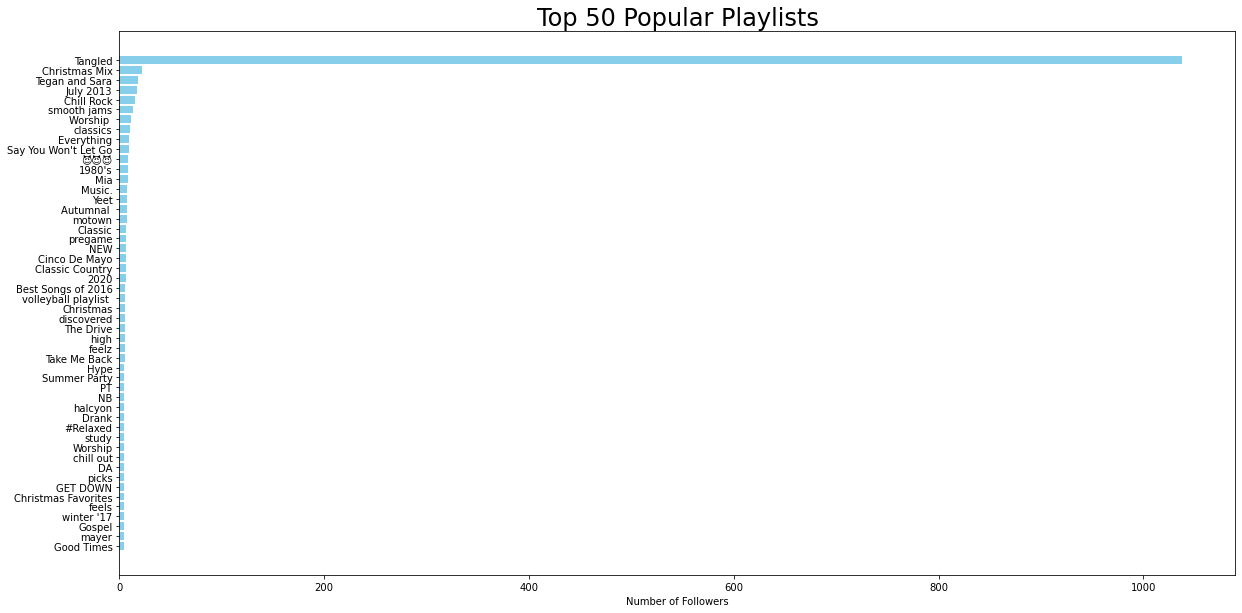

In [137]:
# Top 50 playlist sorted by number of followers.
fsorted = dfp.sort_values(by='num_followers', ascending=False)
top50 = fsorted.head(50)
plt.figure(figsize=(20, 10))
plt.barh(top50['name'], top50['num_followers'], color='skyblue')
plt.xlabel('Number of Followers')
plt.title('Top 50 Popular Playlists', fontsize=24)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest values at the top
plt.show()

In [123]:
# Open the tracks columns and create a dictionaries about track 
tracks= []
for index, playlist in dfp.iterrows(): #iterate through each playlist
    for track in playlist['tracks']:#iterate through each track of each playlists
        tracks.append({
            'artist_name': track['artist_name'],
            'track_name': track['track_name'],
            'num_followers': playlist['num_followers']
        })
#after have the dictionary, convert it into dataframe
dft = pd.DataFrame(tracks)
dft

,artist_name,track_name,num_followers
0,Missy Elliott,Lose Control (feat. Ciara & Fat Man Scoop),1
1,Britney Spears,Toxic,1
2,Beyoncé,Crazy In Love,1
3,Justin Timberlake,Rock Your Body,1
4,Shaggy,It Wasn't Me,1
...,...,...,...
67498,James Arthur,Say You Won't Let Go,1
67499,Big Words,The Answer,1
67500,Allan Rayman,25.22,1
67501,Jon Jason,Good Feeling,1


**Note:** there are 67502 songs in total (among 1000 playlists) in the first file.

Text(0.5, 0, 'Number of followers')

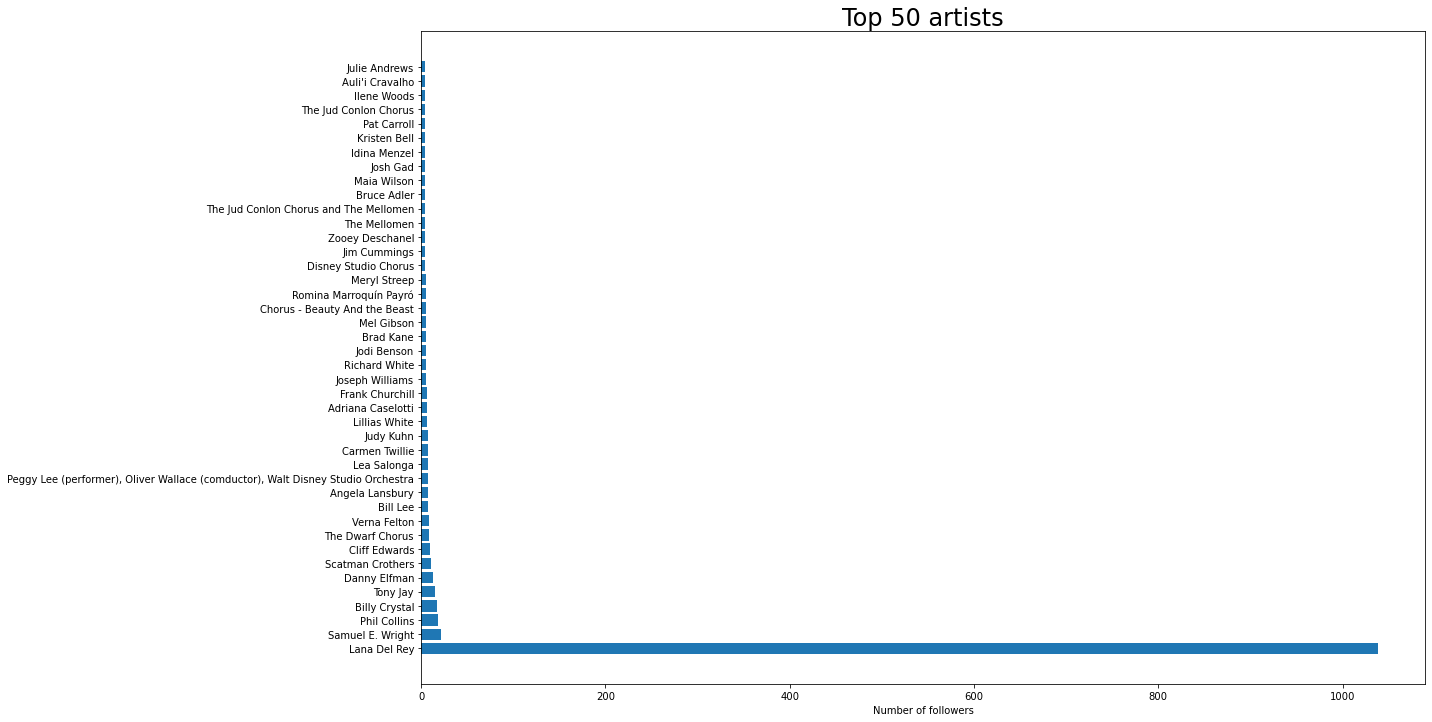

In [138]:
# Top 50 artists 
asorted = dft.sort_values(by='num_followers', ascending=False)
top50a = asorted.head(50)
plt.figure(figsize=(18,12))
plt.barh(top50a['artist_name'],top50['num_followers'])
plt.title('Top 50 artists',fontsize=24)
plt.xlabel('Number of followers')

Text(0.5, 0, 'Number of followers')

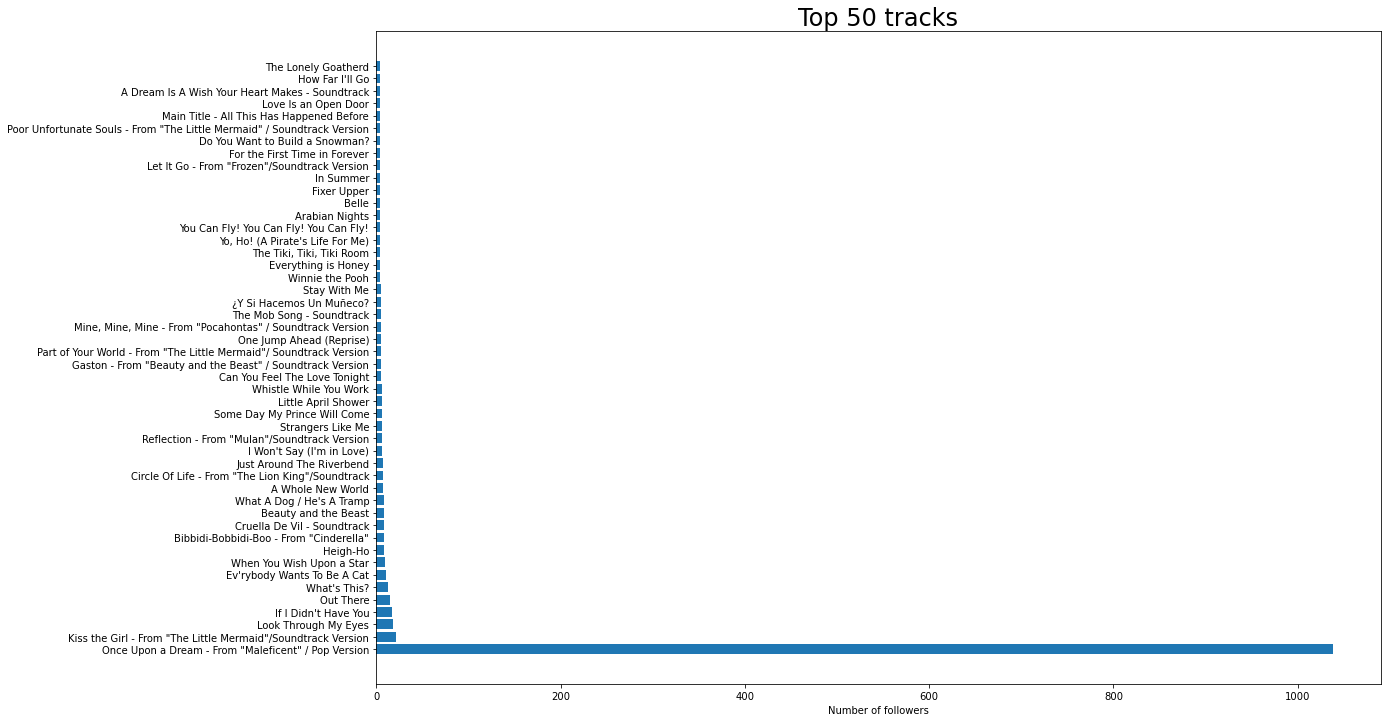

In [139]:
# Top 50 songs 
plt.figure(figsize=(18,12))
plt.barh(top50a['track_name'],top50['num_followers'])
plt.title('Top 50 tracks',fontsize=24)
plt.xlabel('Number of followers')

In [141]:
pip install notebook

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### 5. Convert the JSON data into a structured format to analysis using Apache Spark

In [174]:
!pip install pandas sqlalchemy pyspark 

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 27.3 MB/s eta 0:00:00
Using legacy 'setup.py install' for pyspark, since package 'wheel' is not installed.
  Running setup.py install for pyspark ... done


In [175]:
from sqlalchemy import create_engine #connect to SQL DB 

In [195]:
# Funtion convert json into dataframe (using all the schema tables)
def json_to_dataframe(json_data):
    playlists = json_data['playlists']
    playlists_data = []
    tracks_data = []
    artists_data = []
    albums_data = []
    playlist_tracks_data = []
    


    #playlist table
    for playlist in playlists:
        playlists_data.append({
            'playlist_id': playlist['pid'],
            'name': playlist['name'],
            'collaborative': playlist['collaborative'] == "true",
            'modified_at': pd.to_datetime(playlist['modified_at'], unit='s'),
            'num_tracks': playlist['num_tracks'],
            'num_albums': playlist['num_albums'],
            'num_followers': playlist['num_followers']
        })
        #track table (pplaylist contains track)
        for track in tracks:
               tracks_data.append({
                   'track_uri': track["track_uri"],
                   'track_name': track['track_name'],
                   'duration_ms': track['duration_ms'],
                   'album_uri': track['album_uri'],
                   'artist_uri': track['artist_uri']
               })
               artists_data.append({
                   
                    
                    'artist_uri': track['artist_uri'],
                    'artist_name': track['artist_name']
               })
               albums_data.append({
                    'album_uri': track['album_uri'],
                    'album_name': track['album_name']
               })
               playlist_tracks_data.append({
                    'playlist_id': playlist['pid'],
                    'track_uri': track['track_uri'],
                    'position': track['pos']
               })
                
    return (pd.DataFrame(playlists_data), 
            pd.DataFrame(tracks_data).drop_duplicates(), 
            pd.DataFrame(artists_data).drop_duplicates(), 
            pd.DataFrame(albums_data).drop_duplicates(), 
            pd.DataFrame(playlist_tracks_data))

In [193]:
#Connect to SQLite DB
engine = create_engine('sqlite:///spotify.db')
#Connect to the dataset
json_directory = '/home/student/ttngo/SpotifyDataProject/data'

In [197]:
# Load json data from file 
for filename in os.listdir(json_directory):#list all the file in data folder
    if filename.endswith('.json'):
        filepath = os.path.join(json_directory, filename)
        with open(filepath) as f:
            json_data = json.load(f)
         #Convert JSON data to DataFrames
        playlists_df, tracks_df, artists_df, albums_df, playlist_tracks_df = json_to_dataframe(json_data)
        # Append DataFrames to SQL tables
        playlists_df.to_sql('Playlists', engine, if_exists='append', index=False)
        tracks_df.to_sql('Tracks', engine, if_exists='append', index=False)
        artists_df.to_sql('Artists', engine, if_exists='append', index=False)
        albums_df.to_sql('Albums', engine, if_exists='append', index=False)
        playlist_tracks_df.to_sql('Playlist_Tracks', engine, if_exists='append', index=False)

        print(f"Processed {filename}")

KeyError: 'track_uri'